In [2]:
import xarray as xr
import numpy as np
import dask
from tqdm import tqdm
import pandas as pd
import xwmb
import xwmt
import xgcm
import warnings
warnings.filterwarnings('ignore')

In [3]:
xwmb.__version__, xwmt.__version__, xgcm.__version__

('0.1.0', '0.1.1', '0.8.2.dev15+g7492277')

In [4]:
hfdrake_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/data_daily/"
ds = xr.open_mfdataset(f"{hfdrake_path}/*.ocean_daily.*.nc", chunks={"time":1})
snap = xr.open_mfdataset(f"{hfdrake_path}/*.ocean_daily_snap*.nc", chunks={"time":1})
static = xr.open_dataset("/pub/hfdrake/datasets/CM4_MHW_blobs/data/WMT_monthly/ocean_month_rho2.static.nc")#chunks={'time':1})

In [25]:
mt_path = "/pub/mariant3/WarmWaterMasses/02_tracking-mhws/"
blobs = xr.open_dataset(f"{mt_path}/01860503-01901020_ocetrac-labels-region.nc")
labels = blobs.blobs
manso = pd.read_pickle(f"{mt_path}/01860503-01901020_mhw-metrics-region.pkl")

In [38]:
manso

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area
0,3,"[0186-05-09, 0186-05-10, 0186-05-11, 0186-05-1...","[([10.687478569214495, 10.687478569214495, 10....",NaN,16,"[30.577562, 30.524511, 30.282787, 29.90784, 29...","[29.438, 29.407696, 29.413874, 29.361107, 29.3...","[28.607817, 28.37463, 28.442465, 28.612474, 28...",5.406714e+05,"[380071300000.0, 696309600000.0, 792937000000...."
1,6,"[0186-05-30, 0186-05-31, 0186-06-01, 0186-06-0...","[([10.933041787532273, 10.933041787532273, 10....",NaN,13,"[30.057089, 30.454035, 30.46838, 30.451525, 30...","[29.311945, 29.442247, 29.538956, 29.57242, 29...","[28.448698, 28.309492, 28.496428, 28.540184, 2...",3.501574e+05,"[340643500000.0, 483869520000.0, 622780100000...."
2,22,[0186-07-20],"[([18.66104935115552, 18.66104935115552, 18.66...",NaN,1,[31.270472],[29.813925],[27.587831],1.302869e+04,[285375530000.0]
3,25,"[0186-07-26, 0186-07-27, 0186-07-28, 0186-07-2...","[([25.82802282930681, 25.82802282930681, 25.82...",NaN,29,"[31.408276, 31.437366, 31.503633, 31.628426, 3...","[29.645166, 29.672773, 29.730291, 29.838388, 2...","[28.889091, 28.83733, 28.804953, 28.842989, 28...",1.188258e+06,"[287833980000.0, 352467260000.0, 351324600000...."
4,26,"[0186-08-03, 0186-08-04, 0186-08-05, 0186-08-0...","[([20.54502229317784, 20.54502229317784, 20.54...",NaN,32,"[31.636108, 31.620401, 31.84838, 32.26465, 32....","[29.981346, 29.97524, 30.070566, 30.144043, 30...","[27.698223, 27.66954, 27.685774, 27.989813, 27...",8.970981e+05,"[298516220000.0, 322080870000.0, 325828940000...."
...,...,...,...,...,...,...,...,...,...,...
81,246,"[0190-09-13, 0190-09-14, 0190-09-15, 0190-09-1...","[([12.157724627851596, 12.157724627851596, 12....",NaN,19,"[31.27847, 31.299314, 31.333862, 31.43928, 31....","[29.403198, 29.40525, 29.461935, 29.54514, 29....","[27.143654, 27.311272, 27.46038, 27.484646, 27...",4.001723e+05,"[741692900000.0, 847470800000.0, 692456100000...."
82,247,"[0190-09-16, 0190-09-17, 0190-09-18, 0190-09-19]","[([20.07611149317811, 20.07611149317811, 20.07...",NaN,4,"[31.091232, 31.278599, 31.359415, 31.240648]","[29.328428, 29.45112, 29.471848, 29.478056]","[28.450603, 28.732035, 28.68586, 28.569616]",5.174078e+04,"[292100300000.0, 307790000000.0, 302742240000...."
83,249,[0190-09-20],"[([11.178401873711781, 11.178401873711781, 11....",NaN,1,[30.114367],[29.211132],[28.488102],1.592007e+04,[397676450000.0]
84,252,[0190-09-27],"[([18.186678776990284, 18.186678776990284, 18....",NaN,1,[31.19624],[29.413017],[28.652298],1.352999e+04,[312604160000.0]


In [41]:
event = (labels ==26).any("time")

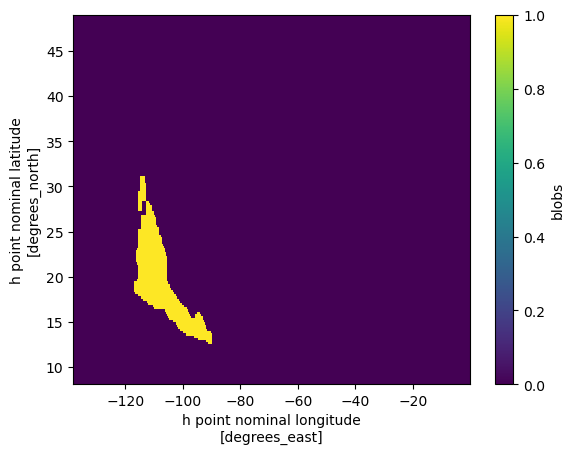

In [43]:
event.plot()

In [44]:
wmt

<xarray.Dataset>
Dimensions:                                    (time: 1459,
                                                thetao_i_target: 441,
                                                time_bounds: 1459, xh: 269,
                                                yh: 130, thetao_l_target: 440)
Coordinates:
  * time                                       (time) object 0186-01-02 12:00...
  * thetao_i_target                            (thetao_i_target) float64 -4.0...
  * time_bounds                                (time_bounds) object 0186-01-0...
  * xh                                         (xh) float64 -137.9 ... -69.91
  * yh                                         (yh) float64 10.2 10.44 ... 39.07
  * thetao_l_target                            (thetao_l_target) float64 -4.0...
    geolat                                     (yh, xh) float32 10.2 ... 39.07
    geolon                                     (yh, xh) float32 -137.4 ... -7...
    areacello                                  (yh, xh) float32 7.503e+08 ......
    deptho                                     (yh, xh) float32 4.806e+03 ......
    lon                                        (yh, xh) float32 -137.4 ... -7...
    lat                                        (yh, xh) float32 10.2 ... 39.07
Data variables: (12/21)
    Eulerian_tendency                          (time, thetao_l_target) float64 ...
    bottom_flux                                (time, thetao_l_target) float64 ...
    frazil_ice                                 (time, thetao_l_target) float64 ...
    surface_ocean_flux_advective_negative_lhs  (time, thetao_l_target) float64 ...
    surface_ocean_flux_advective_negative_rhs  (time, thetao_l_target) float64 ...
    surface_exchange_flux                      (time, thetao_l_target) float64 ...
    ...                                         ...
    mass_tendency                              (time, thetao_l_target) float64 ...
    dt                                         (time) float64 8.64e+04 ... 8....
    Leibniz_material_derivative                (time, thetao_l_target) float64 ...
    spurious_numerical_mixing                  (time, thetao_l_target) float64 ...
    advection_plus_BC                          (time, thetao_l_target) float64 ...
    diabatic_advection                         (time, thetao_l_target) float64 ...

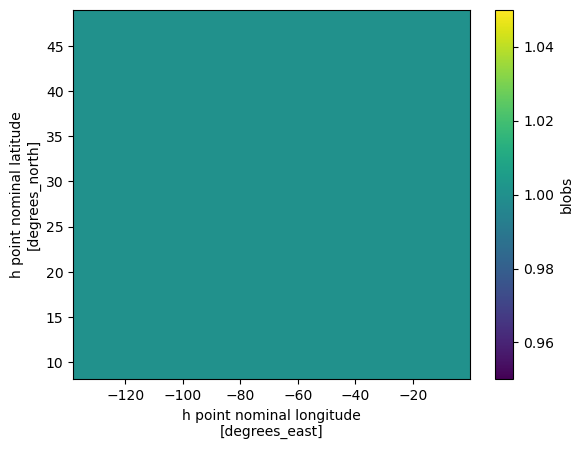

In [27]:
event.plot()

In [7]:
# Merge snapshots with time-averages
snap = snap.rename({
    **{'time':'time_bounds'},
    **{v:f"{v}_bounds" for v in snap.data_vars}
})
ds = xr.merge([ds.sel(time=ds.time[1:]), snap])
ds

<xarray.Dataset>
Dimensions:                         (time: 1459, xh: 269, yh: 130, zl: 75,
                                     xq: 270, yq: 131, time_bounds: 1460)
Coordinates:
  * time                            (time) object 0186-01-02 12:00:00 ... 018...
  * xh                              (xh) float64 -137.9 -137.7 ... -70.16 -69.91
  * yh                              (yh) float64 10.2 10.44 ... 38.87 39.07
  * zl                              (zl) float64 1.0 3.0 ... 3.591e+03 5.111e+03
  * xq                              (xq) float64 -137.8 -137.6 ... -69.76 -69.51
  * yq                              (yq) float64 10.32 10.56 ... 39.16 39.36
  * time_bounds                     (time_bounds) object 0186-01-02 00:00:00 ...
Data variables: (12/27)
    S_advection_xy                  (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    T_advection_xy                  (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    T_adx                           (time, zl, yh, xq) float32 dask.array<chunksize=(1, 75, 130, 270), meta=np.ndarray>
    T_ady                           (time, zl, yq, xh) float32 dask.array<chunksize=(1, 75, 131, 269), meta=np.ndarray>
    Th_tendency_vert_remap          (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    boundary_forcing_h_tendency     (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    ...                              ...
    wfo                             (time, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
    rhopot2_bounds                  (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    thetao_bounds                   (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    thkcello_bounds                 (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    volcello_bounds                 (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    zos_bounds                      (time_bounds, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
Attributes:
    filename:          01860101.ocean_daily.nc
    title:             CM4_piControl_C_restartyear186
    associated_files:  areacello: 01860101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    history:           Wed Mar 20 15:17:19 2024: ncks -v S_advection_xy -d xh...
    NCO:               netCDF Operators version 5.0.1 (Homepage = http://nco....

In [8]:
ds = xr.merge([static,ds],join='inner')

In [9]:
def add_estimated_layer_interfaces(ds):
    return ds.assign_coords({"zi": xr.DataArray(
        np.concatenate([[0], 0.5*(ds.zl.values[1:]+ds.zl.values[0:-1]), [6000]]),
        dims=('zi',)
    )})

In [10]:
ds = add_estimated_layer_interfaces(ds)

In [11]:
# Add core coordinates of static to ds
ds = ds.assign_coords({
    "areacello": xr.DataArray(ds["areacello"].values, dims=('yh', 'xh',)), # Required for area-integration
    "lon": xr.DataArray(ds["geolon"].values, dims=('yh', 'xh',)), # Required for calculating density if not already provided!
    "lat": xr.DataArray(ds["geolat"].values, dims=('yh', 'xh',)), # Required for calculating density if not already provided!
    "xq": xr.DataArray(ds["xq"].values, dims=('xq',)),
    "yq": xr.DataArray(ds["yq"].values, dims=('yq',)),
    "deptho": xr.DataArray(ds["deptho"].values, dims=('yh', 'xh',)),
    "geolon": xr.DataArray(ds["geolon"].values, dims=('yh', 'xh',)),
    "geolat": xr.DataArray(ds["geolat"].values, dims=('yh', 'xh',)),
    "geolon_c": xr.DataArray(ds["geolon_c"].values, dims=('yq', 'xq',)),
    "geolat_c": xr.DataArray(ds["geolat_c"].values, dims=('yq', 'xq',)),
})

# xgcm grid for dataset
coords = {
    'X': {'center': 'xh', 'outer': 'xq'},
    'Y': {'center': 'yh', 'outer': 'yq'},
    'Z': {'center': 'zl', 'outer': 'zi'}
}
#'Z': {'center': 'rho2_l', 'outer': 'rho2_i'}
#'Z': {'center': 'zl', 'outer': 'zl'}
metrics = {
    ('X','Y'): "areacello", # Required for area-integration
}

ds['tos'] = ds['thetao'].isel(zl=0)
#ds['sos'] = ds['so'].isel(zl=0)

grid = xgcm.Grid(ds.copy(), coords=coords, metrics=metrics, boundary={'X':'extend', 'Y':'extend', 'Z':'extend'}, autoparse_metadata=False)

In [12]:
wm = xwmt.WaterMass(grid)

In [13]:
wm.grid._ds

<xarray.Dataset>
Dimensions:                         (xh: 269, yh: 130, yq: 131, xq: 270,
                                     time: 1459, zl: 75, time_bounds: 1460,
                                     zi: 76)
Coordinates: (12/16)
  * xh                              (xh) float64 -137.9 -137.7 ... -70.16 -69.91
  * yh                              (yh) float64 10.2 10.44 ... 38.87 39.07
    geolat                          (yh, xh) float32 10.2 10.2 ... 39.07 39.07
    geolat_c                        (yq, xq) float32 10.32 10.32 ... 39.36 39.36
    geolon                          (yh, xh) float32 -137.4 -137.1 ... -70.38
    geolon_c                        (yq, xq) float32 -137.2 -137.0 ... -70.0
    ...                              ...
  * time_bounds                     (time_bounds) object 0186-01-02 00:00:00 ...
  * zi                              (zi) float64 0.0 2.0 4.0 ... 4.351e+03 6e+03
    lon                             (yh, xh) float32 -137.4 -137.1 ... -70.38
    lat                             (yh, xh) float32 10.2 10.2 ... 39.07 39.07
  * xq                              (xq) float64 -137.8 -137.6 ... -69.76 -69.51
  * yq                              (yq) float64 10.32 10.56 ... 39.16 39.36
Data variables: (12/51)
    Coriolis                        (yq, xq) float32 ...
    areacello_bu                    (yq, xq) float32 ...
    areacello_cu                    (yh, xq) float32 ...
    areacello_cv                    (yq, xh) float32 ...
    dxCu                            (yh, xq) float32 ...
    dxCv                            (yq, xh) float32 ...
    ...                              ...
    thkcello_bounds                 (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    volcello_bounds                 (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    zos_bounds                      (time_bounds, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
    tos                             (time, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
    thkcello_i                      (time, yh, xh, zi) float32 dask.array<chunksize=(1, 130, 269, 76), meta=np.ndarray>
    z                               (time, yh, xh, zl) float32 dask.array<chunksize=(1, 130, 269, 75), meta=np.ndarray>
Attributes:
    external_variables:  areacello areacello

In [14]:
import xbudget
budgets_dict = xbudget.load_preset_budget(model="MOM6_3Donly").copy()
del budgets_dict['salt']['lhs']
del budgets_dict['salt']['rhs']

In [15]:
xbudget.collect_budgets(grid, budgets_dict)

In [16]:
budgets_dict;

In [8]:
import matplotlib.pyplot as plt


In [7]:
import numpy as np
import regionate
import matplotlib.pyplot as plt

# Note: the properties of this region are quite different from the rest of the Baltic!
name = "MANSO"
#lons = np.array([8.,   20.,  29., 24.5, 24.5, 26.1, 17.5, 11.5])
#lons = np.arange([-138, 0, 3.4])
lons = np.array([-138.,-120.,-100., -70., -70., -100., -120., -138.])
#lats = np.arange(8, 49, 1)
lats = np.array([10., 10., 10., 10., 38., 38., 38., 38.])
#lats = np.array([53.5, 53.5, 54.5,  59.,  61.,  63., 64.5,  62.])
manso_region = regionate.GriddedRegion(name, lons, lats, grid)

plt.figure(figsize=(4.75,3.5))
pc = plt.pcolor(
    grid._ds['geolon_c'],
    grid._ds['geolat_c'],
    grid._ds['deptho'],
    cmap="viridis_r"
)
plt.colorbar(pc, label="depth [m]")
plt.plot(regionate.loop(manso_region.lons), regionate.loop(manso_region.lats), color="k");
plt.xlabel("longitude");
plt.ylabel("latitude");
plt.xlim(np.min(lons), np.max(lons))
plt.ylim(np.min(lats), np.max(lats))

#plt.xlim(-200,5)
#plt.ylim(-10,80)

NameError: name 'grid' is not defined

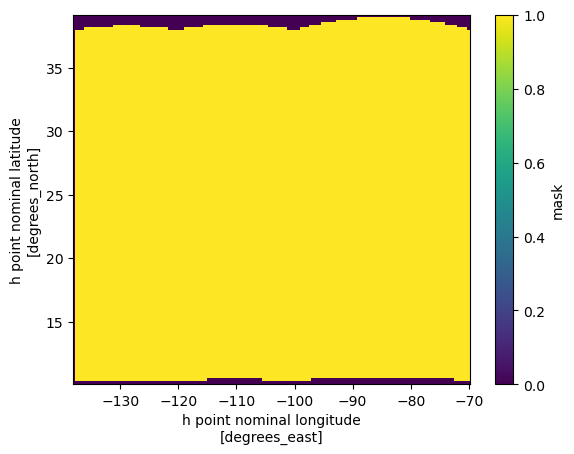

In [18]:
manso_region.mask.plot()

In [19]:
import warnings

lam = "heat"
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    wmb = xwmb.WaterMassBudget(
        grid,
        budgets_dict,
        manso_region.mask
    )
    wmb.mass_budget(lam, greater_than=True, default_bins=True)
    wmtcalc = wmb.wmt

In [20]:
wmtcalc

<xarray.Dataset>
Dimensions:                                    (time: 1459,
                                                thetao_l_target: 440,
                                                thetao_i_target: 441,
                                                time_bounds: 1460, xh: 269,
                                                yh: 130)
Coordinates:
  * time                                       (time) object 0186-01-02 12:00...
  * thetao_i_target                            (thetao_i_target) float64 -4.0...
  * time_bounds                                (time_bounds) object 0186-01-0...
  * xh                                         (xh) float64 -137.9 ... -69.91
  * yh                                         (yh) float64 10.2 10.44 ... 39.07
    geolat                                     (yh, xh) float32 10.2 ... 39.07
    geolon                                     (yh, xh) float32 -137.4 ... -7...
    areacello                                  (yh, xh) float32 7.503e+08 ......
    deptho                                     (yh, xh) float32 4.806e+03 ......
    lon                                        (yh, xh) float32 -137.4 ... -7...
    lat                                        (yh, xh) float32 10.2 ... 39.07
  * thetao_l_target                            (thetao_l_target) float64 -4.0...
Data variables: (12/21)
    diffusion                                  (time, thetao_l_target) float64 dask.array<chunksize=(1, 440), meta=np.ndarray>
    surface_exchange_flux                      (time, thetao_l_target) float64 dask.array<chunksize=(1, 440), meta=np.ndarray>
    surface_ocean_flux_advective_negative_rhs  (time, thetao_l_target) float64 dask.array<chunksize=(1, 440), meta=np.ndarray>
    frazil_ice                                 (time, thetao_l_target) float64 dask.array<chunksize=(1, 440), meta=np.ndarray>
    Eulerian_tendency                          (time, thetao_l_target) float64 dask.array<chunksize=(1, 440), meta=np.ndarray>
    bottom_flux                                (time, thetao_l_target) float64 dask.array<chunksize=(1, 440), meta=np.ndarray>
    ...                                         ...
    mass_tendency                              (time, thetao_l_target) float64 dask.array<chunksize=(1, 440), meta=np.ndarray>
    dt                                         (time) float64 8.64e+04 ... 8....
    Leibniz_material_derivative                (time, thetao_l_target) float64 dask.array<chunksize=(1, 440), meta=np.ndarray>
    spurious_numerical_mixing                  (time, thetao_l_target) float64 dask.array<chunksize=(1, 440), meta=np.ndarray>
    advection_plus_BC                          (time, thetao_l_target) float64 dask.array<chunksize=(1, 440), meta=np.ndarray>
    diabatic_advection                         (time, thetao_l_target) float64 dask.array<chunksize=(1, 440), meta=np.ndarray>

In [21]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('manso', 76988),
 ('metrics', 224),
 ('budgets_dict', 184),
 ('coords', 184),
 ('lats', 176),
 ('lons', 176),
 ('add_estimated_layer_interfaces', 152),
 ('open', 152),
 ('blobs', 112),
 ('ds', 112),
 ('snap', 112),
 ('static', 112),
 ('wmtcalc', 112),
 ('event', 96),
 ('hfdrake_path', 96),
 ('labels', 96),
 ('mt_path', 96),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('xr', 72),
 ('grid', 56),
 ('manso_region', 56),
 ('pc', 56),
 ('wm', 56),
 ('wmb', 56),
 ('name', 54),
 ('lam', 53)]

In [22]:
#wmt_daily = xr.open_mfdataset('/pub/mariant3/WarmWaterMasses/04_WMT-MHW/*-wmt-daily.nc')

In [4]:
wmt186 = xr.open_dataset('/pub/mariant3/WarmWaterMasses/04_WMT-MHW/0186-wmt-daily.nc')
wmt187 = xr.open_dataset('/pub/mariant3/WarmWaterMasses/04_WMT-MHW/0187-wmt-daily.nc')
wmt188 = xr.open_dataset('/pub/mariant3/WarmWaterMasses/04_WMT-MHW/0188-wmt-daily.nc')
wmt189 = xr.open_dataset('/pub/mariant3/WarmWaterMasses/04_WMT-MHW/0189-wmt-daily.nc')

In [5]:
wmt = xr.merge([wmt186,wmt187,wmt188,wmt189])

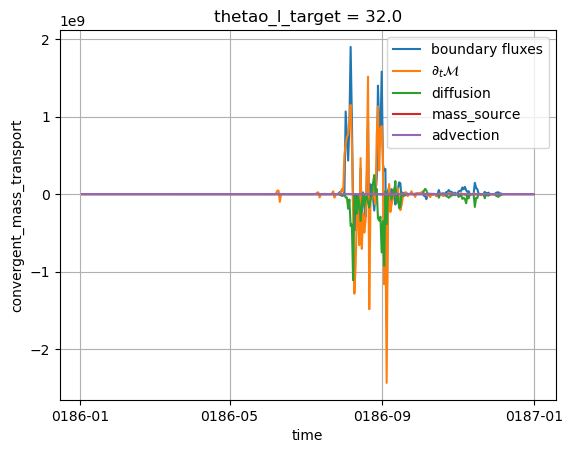

In [24]:
(-wmt.sel(thetao_l_target=32, method='nearest').sel(time=slice('0186','0186'))).boundary_fluxes.plot(label='boundary fluxes')
wmt.sel(thetao_l_target=32,method='nearest').sel(time=slice('0186','0186')).mass_tendency.plot(label=r"$\partial_{t} \mathcal{M}$")
(-wmt.sel(thetao_l_target=32,method='nearest').sel(time=slice('0186','0186')).diffusion).plot(label=r"diffusion")
#wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).advection.plot(label=r"advection")
wmt.sel(thetao_l_target=32,method='nearest').sel(time=slice('0186','0186')).mass_source.plot(label=r"mass_source")
#wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).Leibniz_material_derivative.plot(label='Leibniz_material_derivative')
wmt.sel(thetao_l_target=32,method='nearest').sel(time=slice('0186','0186')).convergent_mass_transport.plot(label='advection')

plt.legend()
plt.grid(True)
plt.show()

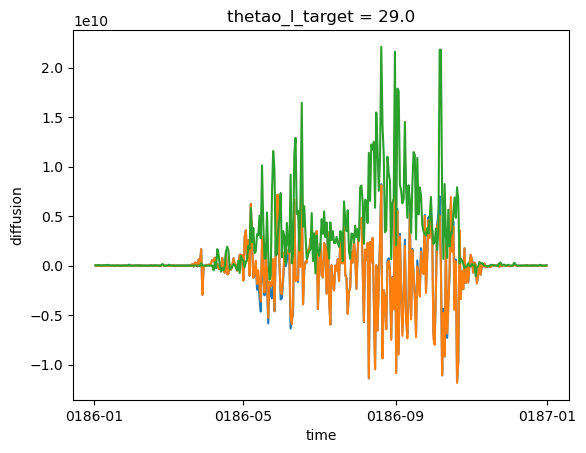

In [22]:
(wmt.boundary_fluxes+wmt.diffusion+wmt.mass_tendency).sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot()
(-wmt.spurious_numerical_mixing.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186'))).plot()
wmt.diffusion.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot()

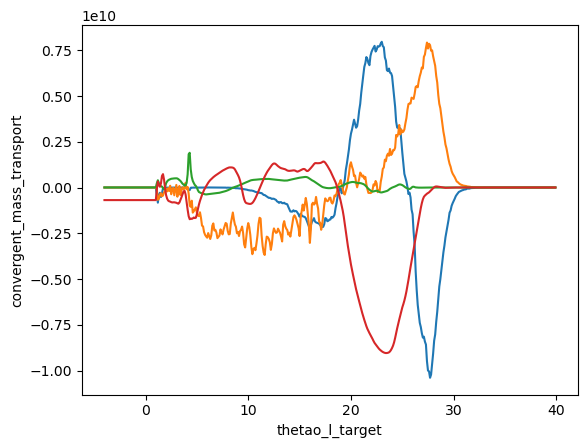

In [100]:
wmt.boundary_fluxes.mean('time_bounds').plot()
wmt.diffusion.mean('time').plot()
wmt.mass_tendency.mean('time').plot()
(-wmt.convergent_mass_transport.mean('time')).plot()

In [24]:
wmt.boundary_fluxes

<xarray.DataArray 'boundary_fluxes' (time: 1459, thetao_l_target: 440)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * time             (time) object 0186-01-02 12:00:00 ... 0189-12-31 12:00:00
  * thetao_l_target  (thetao_l_target) float64 -4.0 -3.9 -3.8 ... 39.7 39.8 39.9

In [ ]:
wmt.boundary_fluxes.isel(time=t).plot()
wmt.diffusion.isel(time=t).plot()
wmt.mass_tendency.isel(time=t).plot()
(-wmt.convergent_mass_transport.isel(time=t)).plot()